In [1]:
from MethylBiomarker import candidate

In [2]:
!ls 03_candidates/mat/* > candidates.mat.fofn
!cat candidates.mat.fofn

03_candidates/mat/crc_tumor_normal_wb.chr1.mat
03_candidates/mat/crc_tumor_normal_wb.chr10.mat
03_candidates/mat/crc_tumor_normal_wb.chr11.mat
03_candidates/mat/crc_tumor_normal_wb.chr12.mat
03_candidates/mat/crc_tumor_normal_wb.chr13.mat
03_candidates/mat/crc_tumor_normal_wb.chr14.mat
03_candidates/mat/crc_tumor_normal_wb.chr15.mat
03_candidates/mat/crc_tumor_normal_wb.chr16.mat
03_candidates/mat/crc_tumor_normal_wb.chr17.mat
03_candidates/mat/crc_tumor_normal_wb.chr18.mat
03_candidates/mat/crc_tumor_normal_wb.chr19.mat
03_candidates/mat/crc_tumor_normal_wb.chr2.mat
03_candidates/mat/crc_tumor_normal_wb.chr20.mat
03_candidates/mat/crc_tumor_normal_wb.chr21.mat
03_candidates/mat/crc_tumor_normal_wb.chr22.mat
03_candidates/mat/crc_tumor_normal_wb.chr3.mat
03_candidates/mat/crc_tumor_normal_wb.chr4.mat
03_candidates/mat/crc_tumor_normal_wb.chr5.mat
03_candidates/mat/crc_tumor_normal_wb.chr6.mat
03_candidates/mat/crc_tumor_normal_wb.chr7.mat
03_candidates/mat/crc_tumor_normal_wb.chr8.mat


In [3]:
#candidate.candidate_cpg_group("03_candidates", 
#                              "candidates.mat.fofn", 
#                              numCase=41, numControl=31, numBG=4, 
#                              minCpGs=3, dist_thr=26 )

In [4]:
#from MethylBiomarker import candidate_redup

#candidate_redup.remove_dup_loci("03_candidates/candidates.bed", "03_candidates/candidates.redup.bed")


In [5]:
#%pylab inline
%matplotlib notebook


<IPython.core.display.Javascript object>


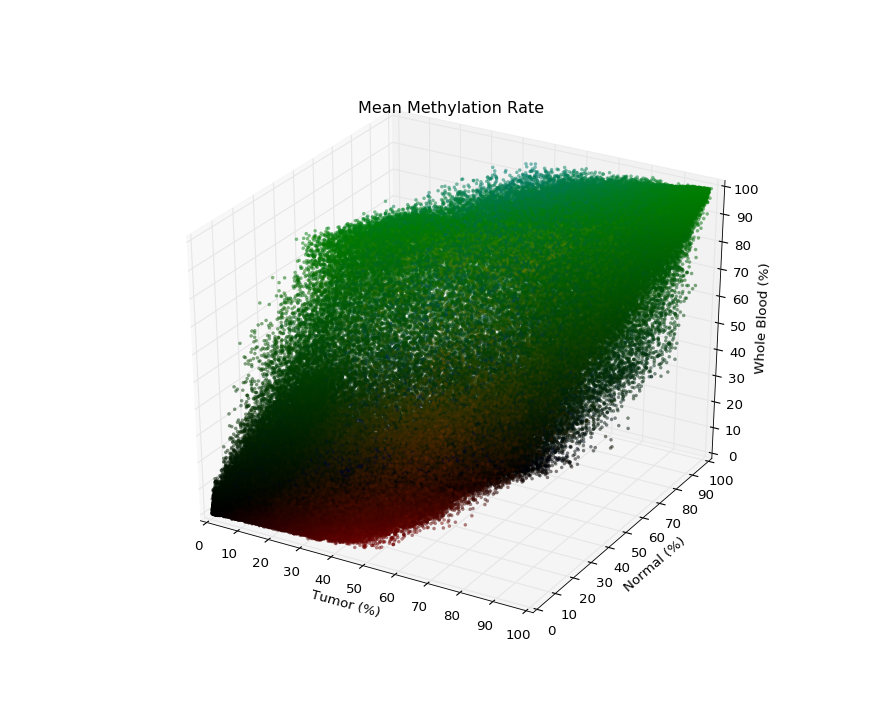

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t = pd.read_table( '03_candidates/candidates.redup.nonan.xyz.dat', sep='\t' )
x=t.meanT
y=t.meanN
z=t.meanB

fig = plt.figure(figsize=(11,9))

ax = fig.add_subplot(1, 1, 1, projection='3d')

scale=100
r = [(i-j)/scale if ((i-j)> 0) else 0 for i,j in zip(x,y)]
b = [(j-i)/scale if ((j-i)> 0) else 0 for i,j in zip(x,y)]
clr = np.column_stack((r, [0]*x.size, b))
clr = np.column_stack((r, z/200, b))
a = [100]*z.size-z

ax.scatter(t.meanT, t.meanN, t.meanB, c=clr, alpha=0.5, edgecolors='none', s=10, lw=0)

#label=group)

scale=100

ax.set_xticks(np.arange(0,1.05*scale,0.1*scale))
ax.set_yticks(np.arange(0,1.05*scale,0.1*scale))
ax.set_zticks(np.arange(0,1.05*scale,0.1*scale))

ax.set_xlim (0,1*scale)
ax.set_ylim (0,1*scale)
ax.set_zlim (0,1*scale)

ax.set_xlabel('Tumor (%)')
ax.set_ylabel('Normal (%)')
ax.set_zlabel('Whole Blood (%)')

plt.title('Mean Methylation Rate')
#plt.legend(loc=2)
plt.show()
#p = ax.plot_surface(t.meanT, t.meanN, t.meanB, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
#cb = fig.colorbar(p, shrink=0.5)


In [7]:
#from MethylBiomarker import visu

#infile='03_candidates/candidates.redup.bed'
#x, y = visu.select_column(infile, x=7, y=8, header=True)

#visu.qqplot(x,y, scale = 'percent', x_label = 'Tumor', y_label = 'Normal')


In [8]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import numpy as np
import pandas as pd

t = pd.read_table( '03_candidates/candidates.redup.nonan.20.20.5.xyz.dat', sep='\t' )

#sep='-', index_col=0, header=None, names=['A','B','C'],
#                          lineterminator='\n')
x=np.array(t.meanT)
y=np.array(t.meanN)
z=np.array(t.meanB)

#plotly.tools.set_credentials_file(username='hayan.lee', api_key='rXzPUR5EIHl4q2eJ3FEB')
plotly.offline.init_notebook_mode()

scale=100
r = [(i-j)/scale if ((i-j)> 0) else 0 for i,j in zip(x,y)]
b = [(j-i)/scale if ((j-i)> 0) else 0 for i,j in zip(x,y)]

clr = np.column_stack((r, [0]*x.size, b))
clr = np.column_stack((r, z/200, b))
a = [100]*z.size-z


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=x-y,                # set color to an array/list of desired values
        colorscale='RdBu',   # choose a colorscale
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout(
    #autosize=False,
    #width=600,
    height=800,
    title="Methylation Ratio",
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    ),
    scene=dict(
        camera=dict(
            eye=dict(
                x=-1.25,
                y=-1.25,
                z=1.25
            )
        ),
        xaxis=dict(
            title="X:Tumor(%)",
            tickvals=[0,5,10,15,20,25,30,35,40,45,50,55,60]
        ),
        yaxis=dict(
            title="Y:Normal(%)"
        ),
        zaxis=dict(
            title="Z:Whole Blood(%)"
        )        
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter-colorscale')
#py.iplot(fig, filename='3d-meanTNB')
    